In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 16
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1753 		 0.1 		 0.1 |
| 1382 		 0.1 		 0.1 |
| 2147 		 0.1 		 0.1 |
| 2518 		 0.1 		 0.1 |
| 1570 		 0.1 		 0.1 |
| 1810 		 0.1 		 0.1 |
| 1395 		 0.1 		 0.1 |
| 4725 		 0.1 		 0.1 |
| 6396 		 0.1 		 0.1 |
| 1316 		 0.1 		 0.1 |
| 1439 		 0.1 		 0.1 |
| 462 		 0.1 		 0.1 |
| 97 		 0.1 		 0.1 |
| 3189 		 0.1 		 0.1 |
| 155 		 0.1 		 0.1 |
| 2974 		 0.1 		 0.1 |
| 1960 		 0.1 		 0.1 |
| 1203 		 0.1 		 0.1 |
| 6259 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1545.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 2181
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


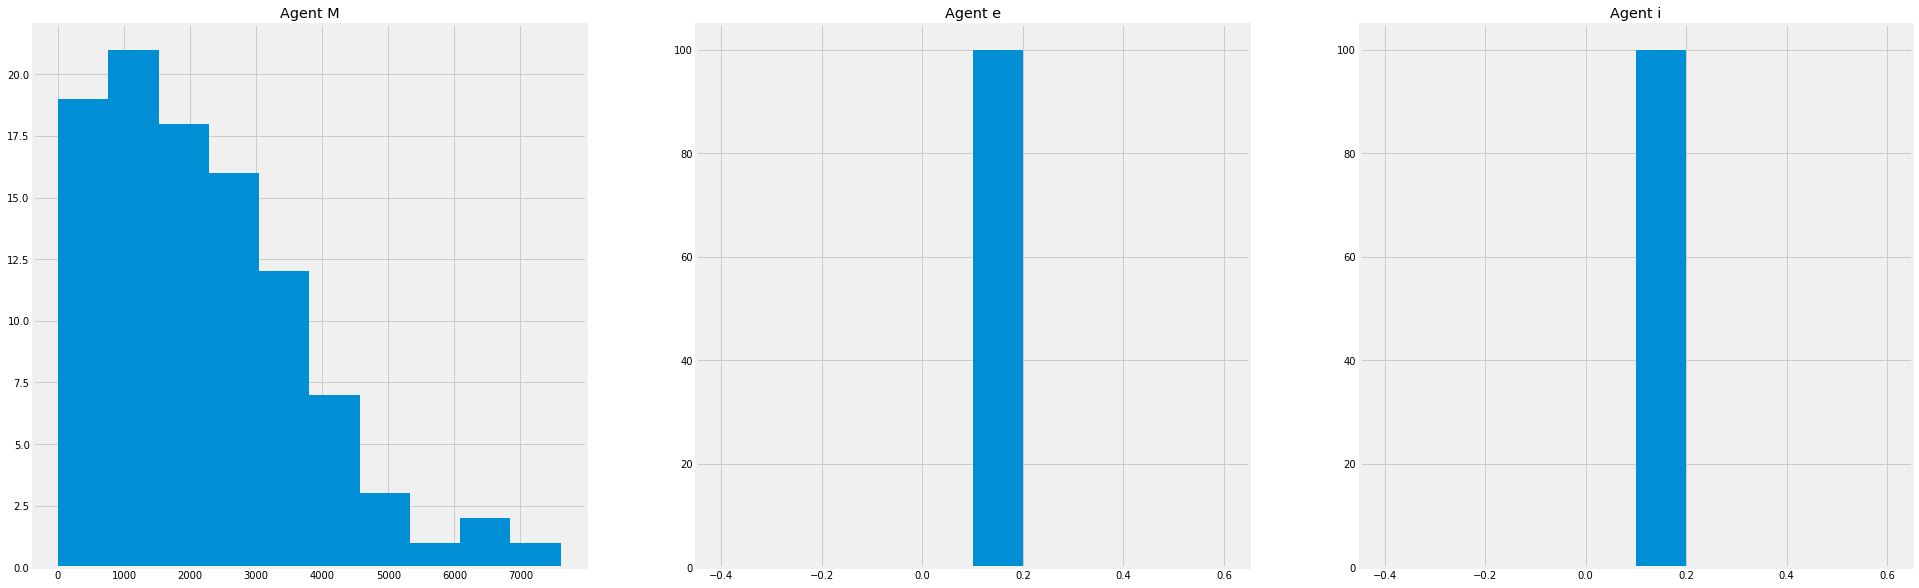

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 124.0, Temptation: 138.0, Sucker: -14.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 158.0, Temptation: 175.0, Sucker: -18.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 193.0, Temptation: 215.0, Sucker: -21.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 158.0, Temptation: 175.0, Sucker: -18.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 227.0, Temptation: 252.0, Sucker: -25.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 158.0, Temptation: 175

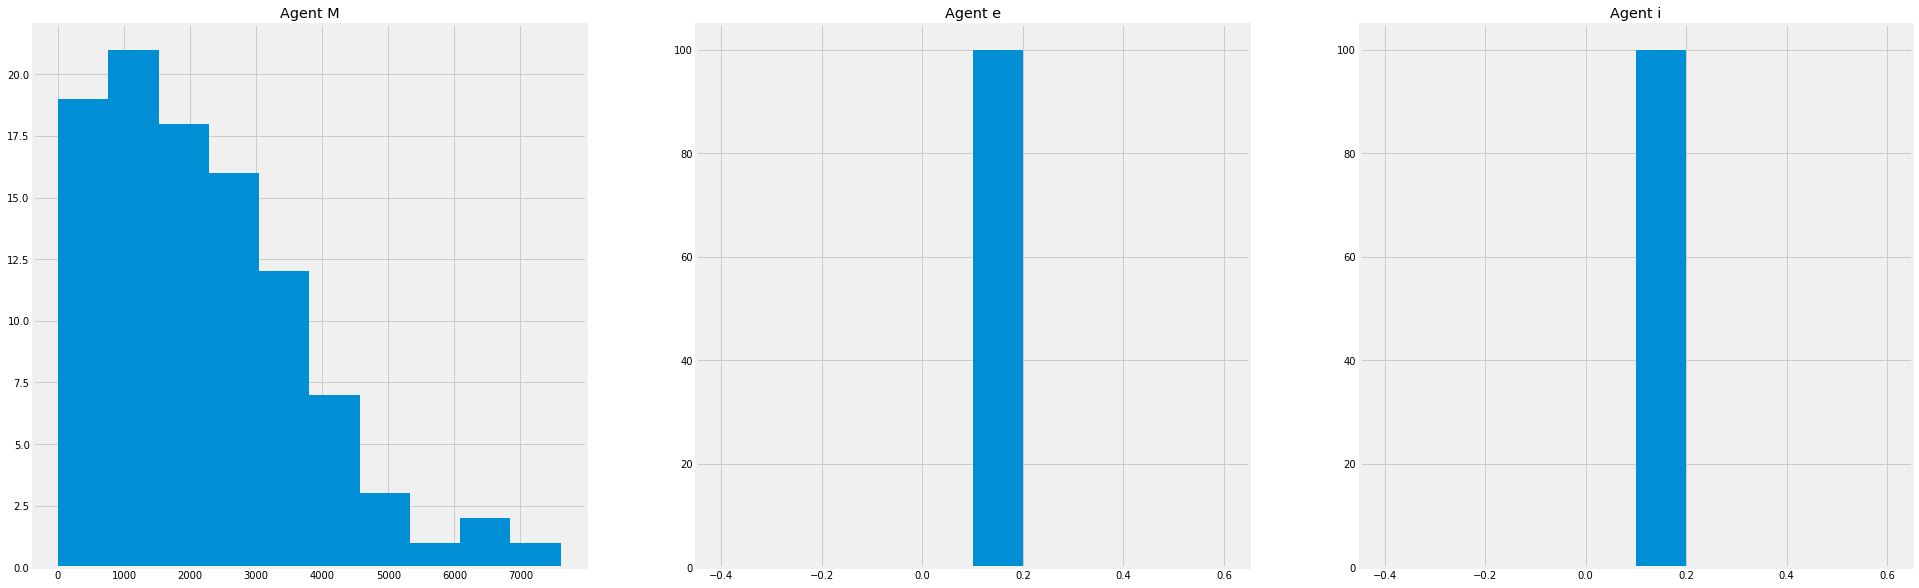

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 39 minutes.
    S.D.  Counts Seed
0    0.5     275   16
1    0.6     261   16
2    0.7     243   16
3    0.8     220   16
4    0.9     198   16
5    1.0     187   16
6    1.1     185   16
7    1.2     161   16
8    1.3     183   16
9    1.4     142   16
10   1.5     123   16
11   1.6     112   16
12   1.7      86   16
13   1.8      60   16
14   1.9      40   16
15   2.0      26   16
16   2.1      24   16
17   2.2      17   16
18   2.3       9   16
19   2.4       5   16
20   2.5       0   16
21   2.6       0   16
22   2.7       0   16
23   2.8       0   16
24   2.9       0   16
25   3.0       0   16


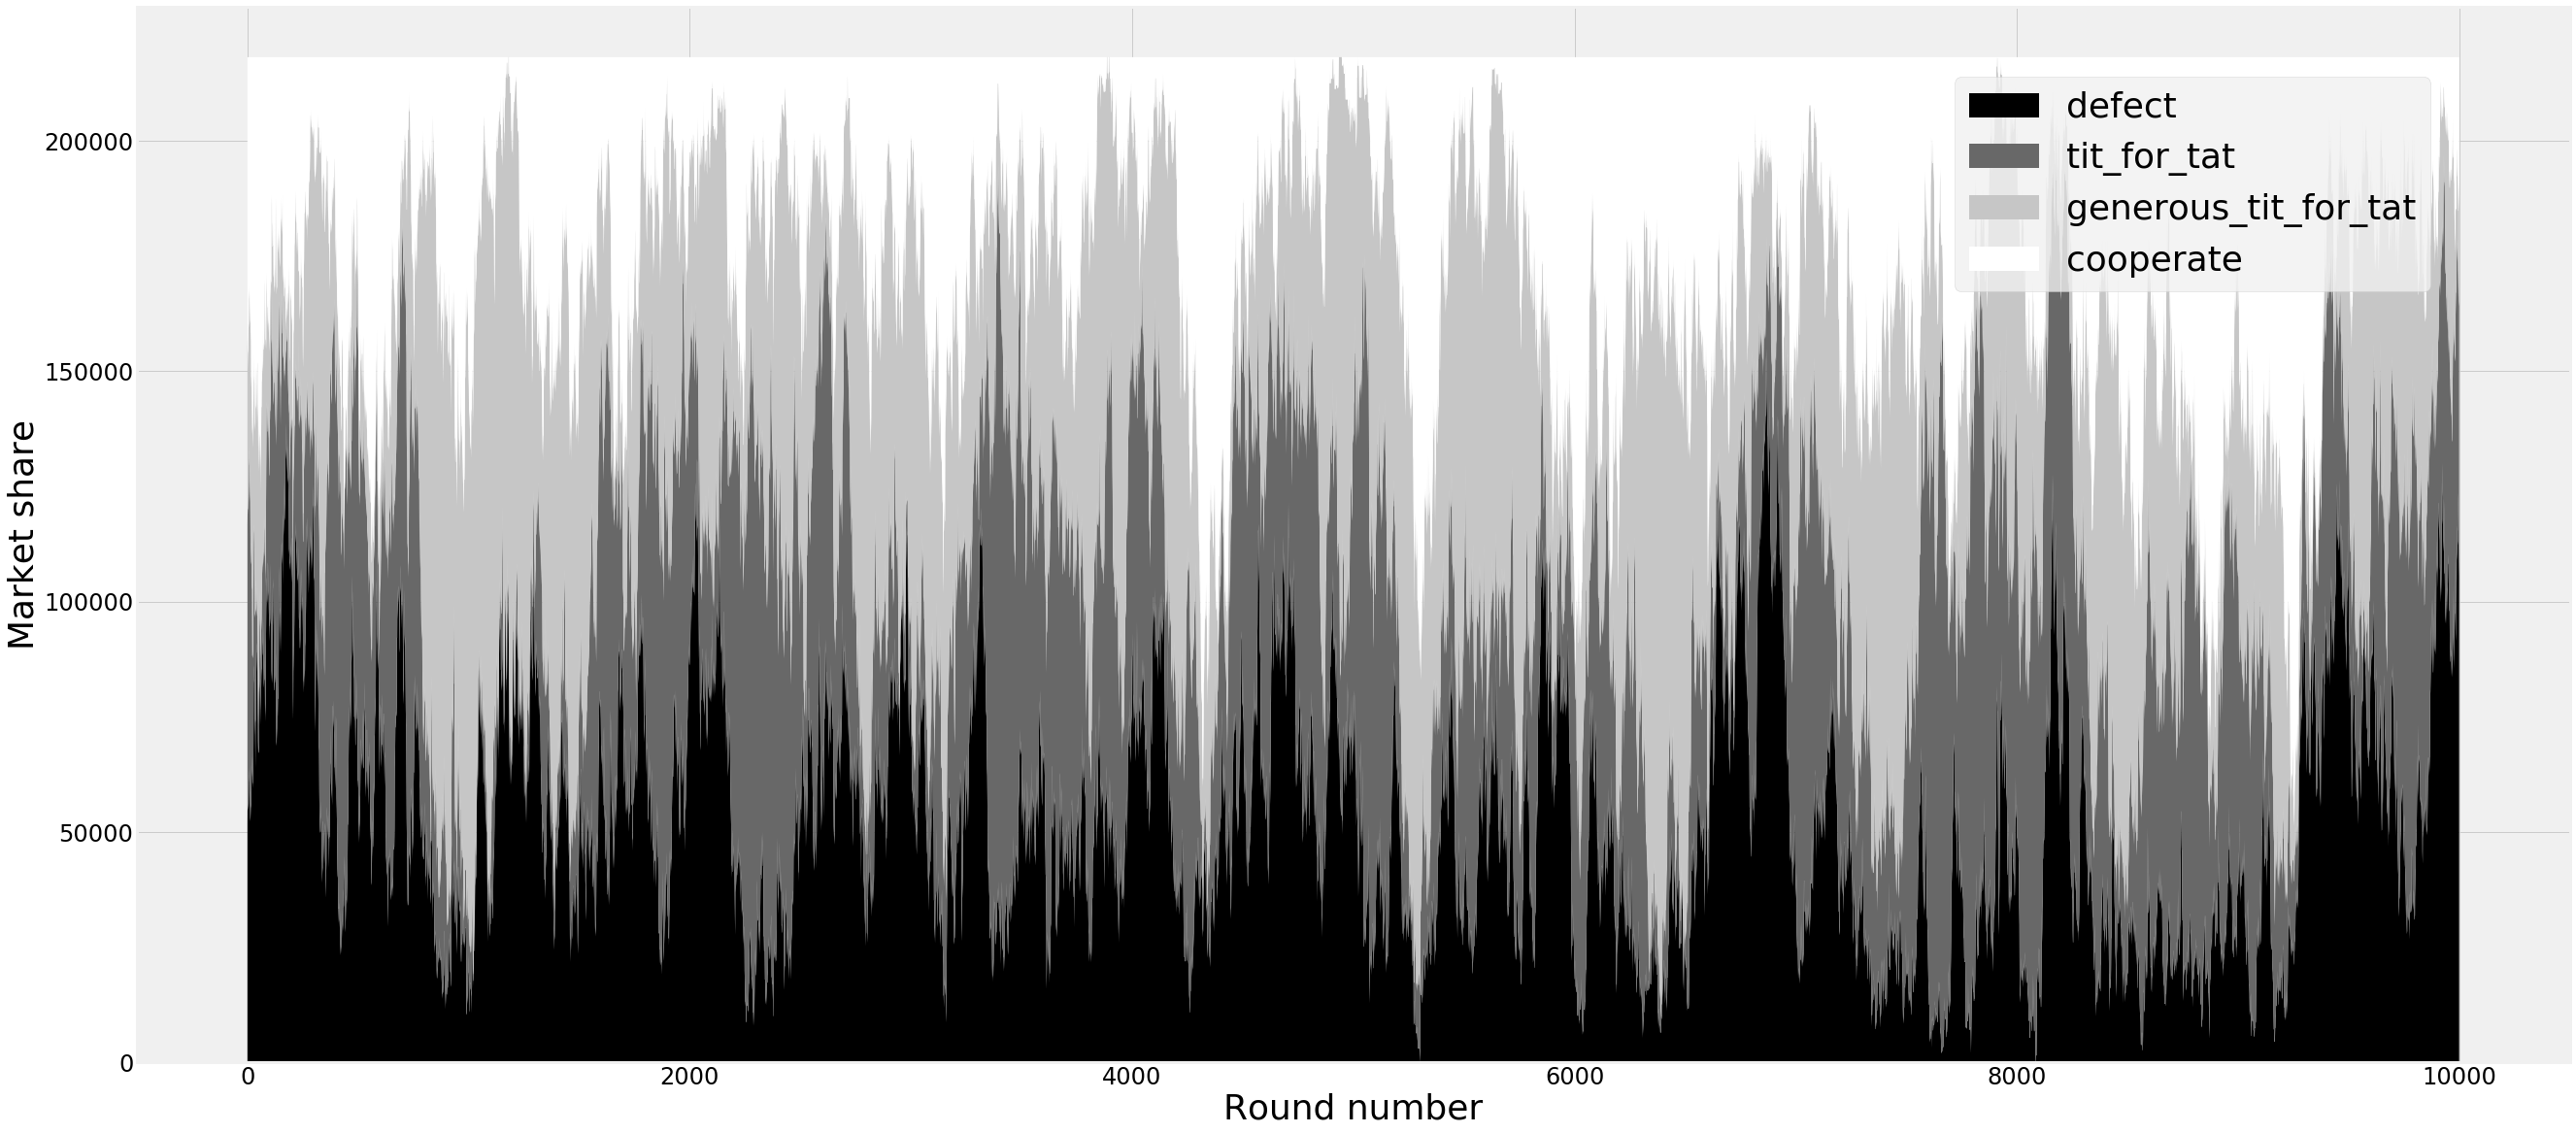

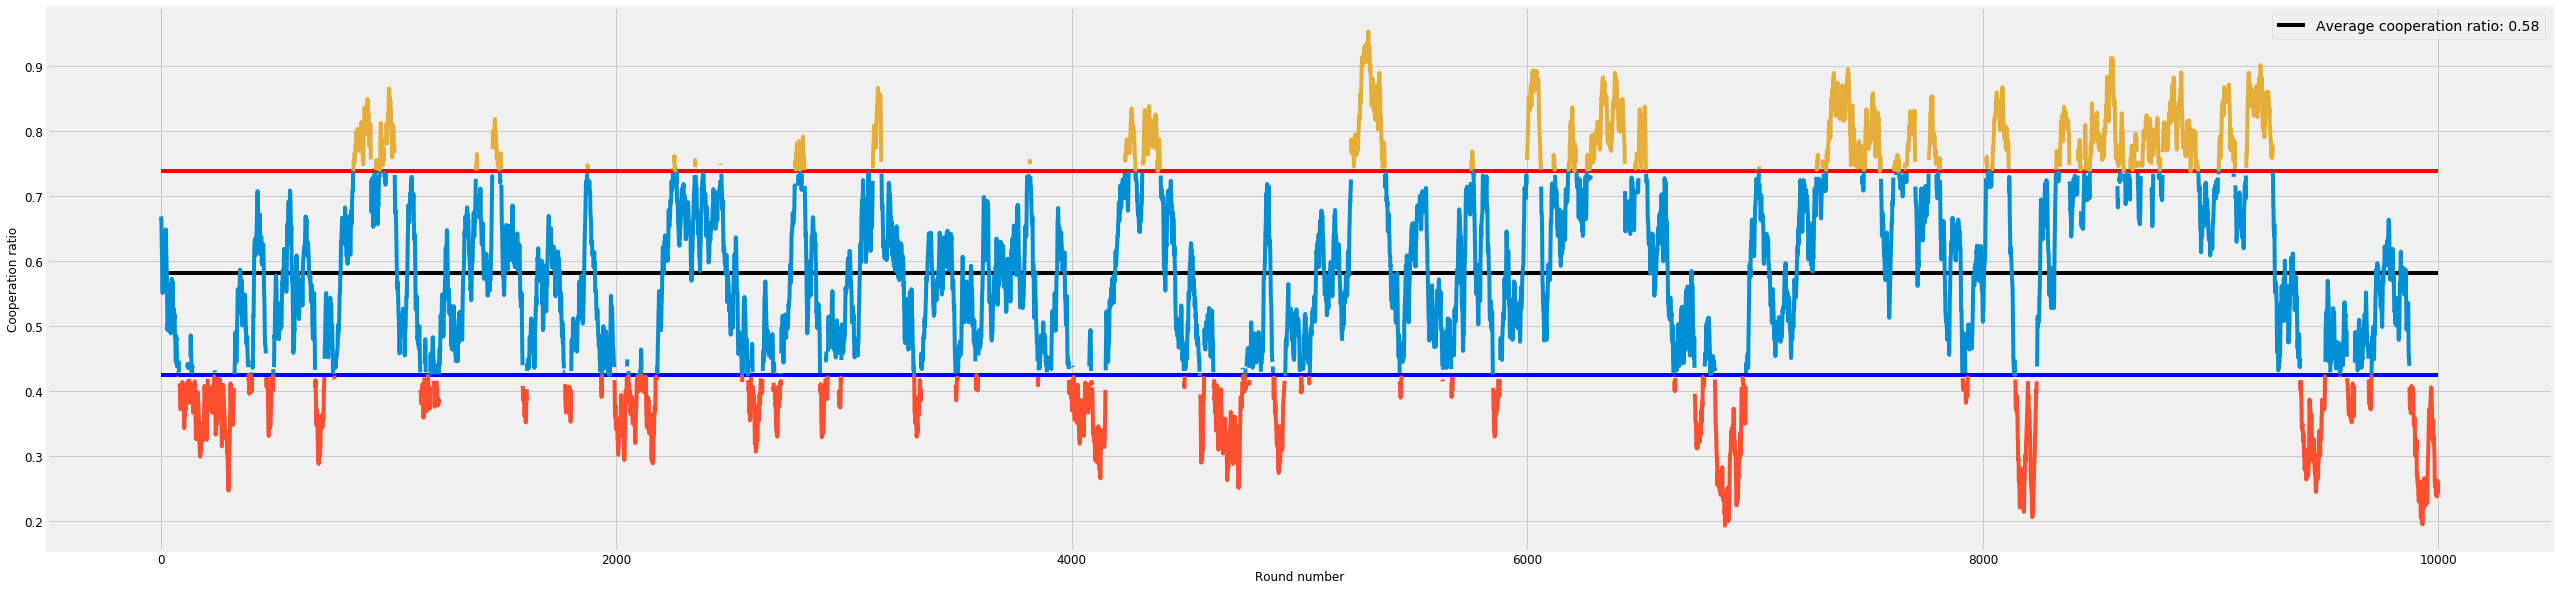

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdm", seed = str(seed))